In [ ]:
pip install tensorflow

In [ ]:
pip show tensorflow

In [ ]:
pip install --upgrade tensorflow

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar',origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')
print(data_dir)
print(data_dir.exists())

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

In [ ]:
roses=list(data_dir.glob('roses*/*'))
PIL.Image.open(str(roses[1]))

In [ ]:
import tensorflow as tf
print(tf.__version__)

2025-04-03 19:58:56.686781: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.16.2
Dataset directory exists: True
Files in directory: [PosixPath('/Users/apple/.keras/datasets/flower_photos/roses'), PosixPath('/Users/apple/.keras/datasets/flower_photos/.DS_Store'), PosixPath('/Users/apple/.keras/datasets/flower_photos/sunflowers'), PosixPath('/Users/apple/.keras/datasets/flower_photos/daisy'), PosixPath('/Users/apple/.keras/datasets/flower_photos/flower_photos'), PosixPath('/Users/apple/.keras/datasets/flower_photos/dandelion'), PosixPath('/Users/apple/.keras/datasets/flower_photos/tulips'), PosixPath('/Users/apple/.keras/datasets/flower_photos/LICENSE.txt')]
Total images: 3670


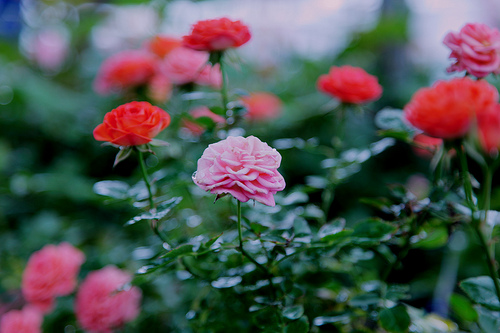

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pathlib

print(tf.__version__)

# Download dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar',origin=dataset_url, extract=True)
# Fix the path
data_dir = pathlib.Path(data_dir).parent / "flower_photos"

# Check if path exists
print("Dataset directory exists:", data_dir.exists())
print(f"Files in directory: {list(data_dir.glob('*'))}")
# Count images
image_count = len(list(data_dir.glob('*/*.jpg')))
print("Total images:", image_count)

# Display an image
roses = list(data_dir.glob('roses/*.jpg'))  # Correct glob pattern
PIL.Image.open(str(roses[1]))

In [3]:
#Dataset creation for out need
#reshaping the images
batch_size = 32
img_height = 180
img_width = 180

# seeding
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 3670 files belonging to 6 classes.
Using 2936 files for training.


In [4]:
classnames = train_ds.class_names
print(classnames)

['daisy', 'dandelion', 'flower_photos', 'roses', 'sunflowers', 'tulips']


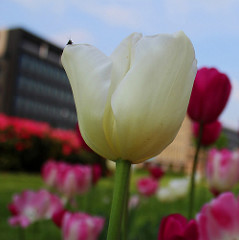

In [5]:
pictures=list(data_dir.glob('tulips*/*'))
PIL.Image.open(pictures[1])

2025-04-03 20:00:05.350424: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


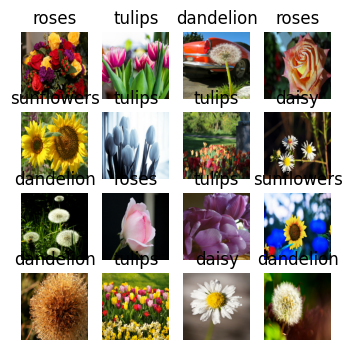

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
for images, labels in train_ds:
    for i in range(16):
        ax=plt.subplot(4,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classnames[labels[i]])
        plt.axis("off")